# Gradient Descent

Gradient Descent is an **iterative** algorithm to find a **local minimum** of a function.

**Main idea:**
 - The loss is a function of our coefficient. For each set of parameters there is a a value of loss. We want to find the value of parameters that minimizes the loss!
 - **Start** with a **random** guess.
 - Calculate **derivative** (direction of growth) of the function at that point. If the function is increasing (and we want to find the minimum!) we should move our guess to the left (**opposite direction of derivative**)!
 - **Adjust the guess** in the right direction - by how much? Proportionally to the value of the derivative. (Intuition: If the function is steeply growing I take a greater leap in the opposite direction). You can adjust how bold you want to be with your adjustments by choosing a **learning rate** - value multiplied by the derivative of the function.  
 - **Repeat** this until value of loss is extremely small or **has stopped decreasing** with iterations.
 
**Formula for parameter ($a$) adjustment:**

$$a_{next} = a - \eta \frac{dLoss}{da}$$

Less formally:

$$new\_guess = prev\_guess - learning\_rate \times derivative$$

Let's look at an example from our dataset!

Remember we were doing the following regression in Task 1:

$$\hat{y} = ax +b$$

where, $y$ is the `SalePrice` and $x$ the `Lot Area`, $a$ the slope and $b$ the bias.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('houses.csv')

In [4]:
'''
Function to get MSE for a regression made on Lot Area to predict SalePrice.
'''
def mse(slope, bias):
    return mean_squared_error(df['SalePrice'],slope*df['Lot Area'] + bias)

### Let's look at 1 parameter!

Imagine that all you needed to find was the slope of the regression - someone already had found the optimal bias: $b = 127.56$.
We can get the loss (MSE) for different values of slope, and see which value minimizes the loss.

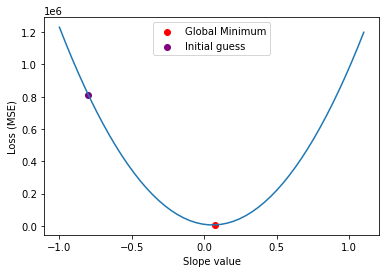

In [41]:
bias = 127.56

slopes = np.linspace(-1,1.1)
mses = np.array([mse(slope, bias) for slope in slopes])
plt.plot(slopes,mses)
plt.scatter(slopes[mses.argmin()],mses.min(), c = 'r', label = 'Global Minimum')
plt.scatter(-0.8,mse(-0.8,bias), c = 'purple', label = 'Initial guess')
plt.xlabel('Slope value')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In this very simple case we can easily get the minimum - but this is not usually the case. Let's apply the Gradient Descent algorithm!
Looking at the plot and your initial guess - in which direction would you move?

 - Negetive derivative (decreasing)
 - Move to the right (positive direction)
 
By how much? Let's calculate the derivative in point $-0.8$ to apply the formula!

$$Loss(a) = \frac{1}{n}\sum_{i=1}^{n} (y_i - ax_i-b)^2$$
$$\frac{dLoss}{da} = \frac{1}{n}\sum_{i=1}^{n} -2(y_i - ax_i-b)x_i$$

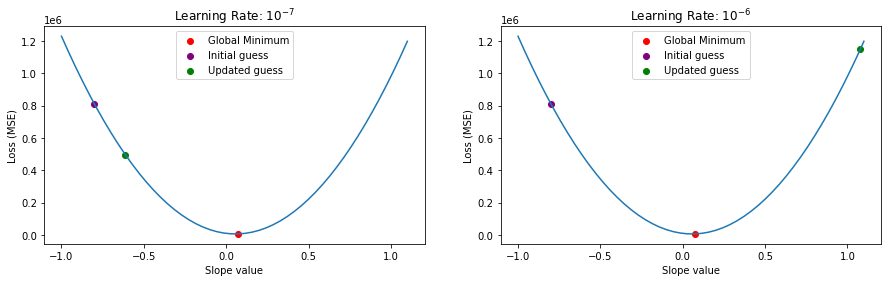

In [69]:
n = len(df)
x = df['Lot Area']
y = df['SalePrice']
a = -0.8

dLoss = (1/n)*np.sum(-2*(y-a*x-bias)*x) # Calculating derivative

learning_rate = 10**-7 # Choosing Learning Rate
new_a = a - dLoss*learning_rate # Updating parameter

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,4))
ax1.plot(slopes,mses)
ax1.scatter(slopes[mses.argmin()],mses.min(), c = 'r', label = 'Global Minimum')
ax1.scatter(-0.8,mse(-0.8,bias), c = 'purple', label = 'Initial guess')
ax1.scatter(new_a,mse(new_a,bias), c = 'green', label = 'Updated guess')
ax1.set_xlabel('Slope value')
ax1.set_ylabel('Loss (MSE)')
ax1.set_title(r'Learning Rate: $10^{-7}$')
ax1.legend()

learning_rate = 10**-6 # Choosing Learning Rate
new_a = a - dLoss*learning_rate # Updating parameter

ax2.plot(slopes,mses)
ax2.scatter(slopes[mses.argmin()],mses.min(), c = 'r', label = 'Global Minimum')
ax2.scatter(-0.8,mse(-0.8,bias), c = 'purple', label = 'Initial guess')
ax2.scatter(new_a,mse(new_a,bias), c = 'green', label = 'Updated guess')
ax2.set_xlabel('Slope value')
ax2.set_ylabel('Loss (MSE)')
ax2.set_title(r'Learning Rate: $10^{-6}$')
ax2.legend()
plt.show()

The choice of **learning rate is very important** - and it depends on the specific problem at hand. Things to consider:

 - Too large learning rates (big leaps) can cause the model to jump around the minimum without being able to converge
 - Too small learning rates (small steps) make training very slow

Looking at the plots above you can see how changing the learning rate impacts the parameter update - with a larger learning rate we jumped over the mnimum!

## More parameters

When we are dealing with more than one parameter, the logic is exactly the same: we take the partial derivative of the loss with respect to each parameter and we update them all. 

Look at the plot of the loss (MSE) bellow for our regression problem (without knowing the bias) - where we have the loss depending on two parameters: $Loss(slope, bias)$. 

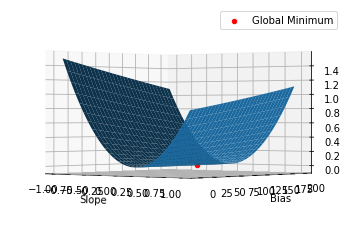

In [71]:
a = np.linspace(-1,1,30)
b = np.linspace(0,200,30)
A, B = np.meshgrid(a, b)
Z = np.array([mse(a, b) for a,b in zip(A.ravel(),B.ravel())]).reshape(A.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, Z,
                       linewidth=0)
ax.scatter(0.056,127.56,mse(0.056,127.56),c='r', label = 'Global Minimum')

ax.view_init(elev=0., azim=310)
ax.set_xlabel('Slope')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss (MSE)')
plt.legend();